In [3]:
from modules.models import KdVBurgersPinn, create_dense_model, create_dense_model_Normalized, FourierFeatures
from modules.data import simulate_kdvburgers
from modules.plots import plot_KdV_model, plot_training_loss
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [4]:
! git add KdV.ipynb
! git commit -m "KdV-Burgers notebook, as is"
! git push origin main

On branch main
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   KPSingleSoliton.ipynb
	modified:   KPXConfig.ipynb
	modified:   KdVOneSoliton.ipynb
	modified:   ../SequentialModel.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	../HyperparameterTuning.ipynb
	AorticPulse.ipynb
	FinalPictures/
	GIF/
	GIFs/
	KPPinnTime15.pickle
	KdVB.ipynb
	KdVDoubleSoliton64-128-128-128-64.pickle
	KdVDoubleSolitonAdded64-128-128-128-64.pickle
	KdVSingleSolitonTime1064-64-64 (1).pickle
	KdVSingleSolitonTime1064-64-64.pickle
	KdVTripleSoliton64-128-128-128-128-64.pickle
	KdVTripleSoliton64-128-128-128-64.pickle
	KdVTripleSolitonTime064-128-128-128-64.pickle
	KdVTripleSolitonTime1064-128-128-128-64.pickle
	PDFsKPIISingleSoliton/
	PDFsKPIIXShape/
	PDFsKPIIYJunction/
	PDFsKPIIYJunctionNew/
	PDFsKdV1Soliton/
	PDFsKdV2Soliton/
	PickleFiles/
	XC

In [3]:
!git config --global user.name "Nadia Aiaseh"
!git config --global user.email "naiaseh@uwo.ca"


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/MyDrive/Trunk/PinnNew")
print(os.getcwdb())

b'/content/drive/MyDrive/Trunk/PinnNew'


In [45]:



phi = 0.
alpha = 0.19
beta = 0.01
gamma = 3.4
c0 = 1.8
# k = 0.4580
# k= alpha/(10*beta)

# c= 6./25. * alpha**2 / beta
# k= alpha/(10*beta)


# ### shock profile initial condition ###
# def phi_function(tx):
#     offset =  0.
#     ksi = tx[:, 1:2]-c*tx[:,0:1]+offset
#     u = 3/25 * (alpha**2)/(beta*gamma) * (1/tf.cosh(k*ksi)**2 - 2*tf.tanh(k*ksi) - 2)
#     # u = tf.where(tf.math.is_nan(u), 0., u)
#     # u = tf.where(tf.math.is_inf(u), 0., u)
#     return u

# def phi_function(tx):
#     offset =  0.
#     ksi = tx[:, 1:2]-c*tx[:,0:1]+offset
#     u = 2*k/gamma *(2 * (alpha + 2*beta*k) + (alpha + 6*beta*k) * 1/tf.cosh(k*ksi)**2 )
#     # u = tf.where(tf.math.is_nan(u), 0., u)
#     # u = tf.where(tf.math.is_inf(u), 0., u)
#     return u


# def phi_function(tx):
#   ksi = 1/2 * (-alpha/(5*beta) * tx[:,1:2] + 6 * alpha**3/(125*beta**2) * tx[:,0:1] )
#   u = 3*alpha**2/(25*gamma*beta) * 1/tf.cosh(ksi)**2 - 6*alpha**2/(25*gamma*beta) * tf.tanh(ksi) + 6*alpha**2/(25*gamma*beta)
#   return u


def phi_function(tx):
    offset =  0.
    ksi = tx[:, 1:2]-c0*tx[:,0:1]+offset
    ampl = 3*c0/gamma
    multiplier = c0/(beta*4)
    u = ampl / tf.cosh(np.sqrt(multiplier)*ksi)**2
    u = tf.where(tf.math.is_nan(u), 0., u)
    return u

def boundary_function(tx):
    return phi*tf.ones_like(tx[:, 1:])

# x_start = 0
# length = 8*np.pi
x_start =  -5. #-10
length = 10.#10
t0 = 0.
time =  3.

In [27]:
k = 0.4580
print(2*k*(1+2*0.1*k))

phi = 0.
alpha = 1.
beta = 0.1
gamma = 1.
c=1.

import math

def quadratic_solver(a, b, c):
    # Calculate discriminant
    discriminant = b**2 - 4*a*c

    # Check if discriminant is positive, negative, or zero
    if discriminant > 0:
        # Two real and distinct roots
        root1 = (-b + math.sqrt(discriminant)) / (2*a)
        root2 = (-b - math.sqrt(discriminant)) / (2*a)
        return root1, root2
    elif discriminant == 0:
        # One real root (repeated)
        root = -b / (2*a)
        return root, root
    else:
        # Two complex roots
        real_part = -b / (2*a)
        imaginary_part = math.sqrt(abs(discriminant)) / (2*a)
        root1 = complex(real_part, imaginary_part)
        root2 = complex(real_part, -imaginary_part)
        return root1, root2

root1, root2 = quadratic_solver(4*beta, 2*alpha, -c)

0.9999056000000002


In [7]:
root1, root2

(0.45803989154980795, -5.4580398915498085)

In [69]:

c0= 2.
# k= np.sqrt(c/4.)

def phi_function(tx):
    offset =  0.
    ksi = tx[:, 1:2]-c0*tx[:,0:1]+offset
    u = c0 / (2*tf.cosh(np.sqrt(c0)*(ksi/2))**2)+phi
    u = tf.where(tf.math.is_nan(u), 0., u)
    return u




Text(0, 0.5, 'u(x,y,t)')

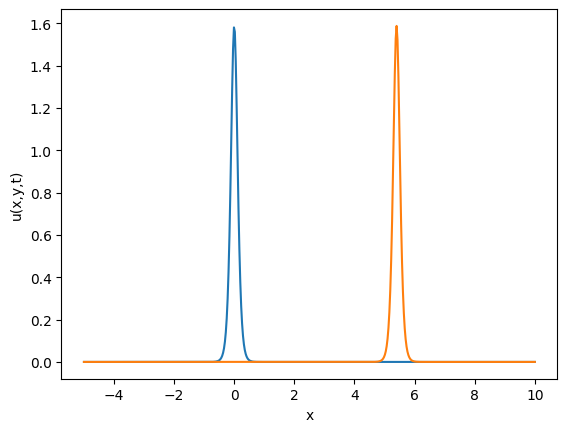

In [46]:
N = 500
TIME = 0.
xt = np.linspace(x_start,length,N).T

tt = np.zeros((N,1))
xt = xt.reshape(-1,1)

tt = tt.reshape(-1,1)
txy2 = np.stack([np.full(tt.shape, TIME),  xt ], axis=1)
txy3 = np.stack([np.full(tt.shape, 3),  xt ], axis=1)
u2 = phi_function(txy2)
u2 = tf.reshape(u2, [xt.shape[0],xt.shape[1]])

u3 = phi_function(txy3)
u3 = tf.reshape(u3, [xt.shape[0],xt.shape[1]])
plt.plot(xt, u2)
plt.plot(xt, u3)

# plt.xlim([0,20])
plt.xlabel('x')
plt.ylabel('u(x,y,t)')
# plt.ylim([0,7])

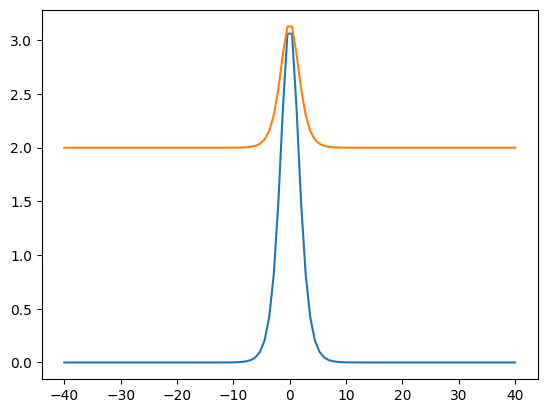

In [20]:
N = 100
TIME = 0.
xt = np.linspace(-40,40,N).T

tt = np.zeros((N,1))
xt = xt.reshape(-1,1)

tt = tt.reshape(-1,1)
txy2 = np.stack([np.full(tt.shape, TIME),  xt ], axis=1)

ksi = xt
u = 2*k/gamma *(2 * (alpha + 2*beta*k) + (alpha + 6*beta*k)) * 1/np.cosh(k*ksi)**2
u2 = 1/np.cosh(k*ksi)**2
u3 =  2*k/gamma *(2 * (alpha + 2*beta*k) + (alpha + 6*beta*k) * 1/np.cosh(k*ksi)**2 )
plt.plot(ksi, u)
# plt.plot(ksi, u2)
plt.plot(ksi,u3)

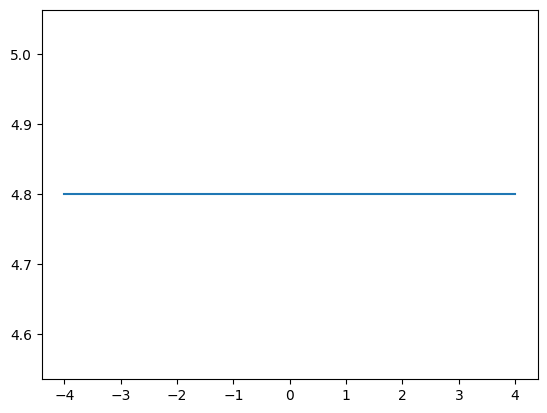

In [30]:
N = 100
TIME = 0.
xt = np.linspace(-4,4,N).T

tt = np.zeros((N,1))
xt = xt.reshape(-1,1)

tt = tt.reshape(-1,1)
txy2 = np.stack([np.full(tt.shape, TIME),  xt ], axis=1)

ksi = xt
u = 3/25 * (alpha**2)/(beta*gamma) * (1/tf.cosh(k*ksi)**2 - 2*tf.tanh(k*ksi) + 2)
u2 = 3/25 * (alpha**2)/(beta*gamma) * (1/tf.cosh(k*ksi)**2)
u_ = 3/25 * (alpha**2)/(beta*gamma) * (1/tf.cosh(k*ksi)**2 - 2*tf.tanh(k*ksi) - 2)
plt.plot(ksi,u-u_)

In [47]:
(tx_eqn, y_eqn), (tx_init, y_init), (tx_boundary, y_boundary) = simulate_kdvburgers(30000, phi_function, boundary_function, x_start, length, t0, time, n_init = None, n_bnd = None, random_seed = 42, dtype=tf.float32)




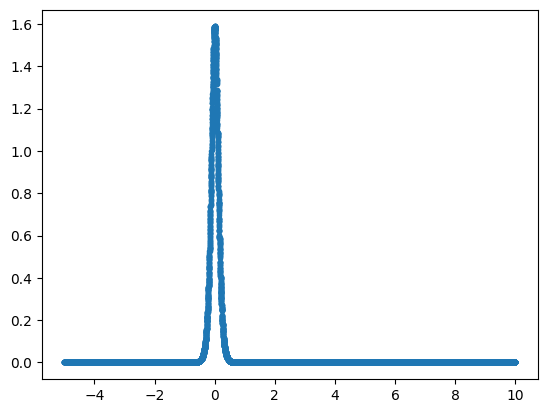

In [48]:

plt.plot( tx_init[:,1:],y_init,'.')

In [49]:
inputs = [tx_eqn, tx_init, tx_boundary]
outputs = [phi_function(tx_eqn), y_eqn, y_init, y_boundary]


In [55]:
normalizer = tf.keras.layers.Normalization(axis=1)
normalizer.adapt(tx_eqn)
tf.shape(tx_eqn)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([30000,     2], dtype=int32)>

In [56]:
backbone = create_dense_model_Normalized([32, 32, 32], activation='tanh', initializer='glorot_normal',normalizer=normalizer,\
    n_inputs=2, n_outputs=1)
pinn = KdVBurgersPinn(backbone, alpha=alpha, beta=beta, gamma=gamma,c=0.)
a0 = 1e-3
decay_step = 1000
rate = 0.95
scheduler = tf.keras.optimizers.schedules.ExponentialDecay(a0, decay_steps= decay_step, decay_rate= rate)
optimizer = tf.keras.optimizers.Adam(learning_rate=scheduler, clipnorm=1.)
pinn.compile(optimizer=optimizer)

In [57]:

history = pinn.fit_custom(inputs, outputs, epochs = 50000, print_every = 500)
# history = pinn.fit(inputs, outputs, batch_size = 30000, epochs = 4000)

Epoch 0, Loss Residual: 0.2600081265, Loss Initial: 0.7299503684, Loss Boundary: 0.4470782578, MAE: 0.5093286633
Epoch 500, Loss Residual: 0.0001110167, Loss Initial: 0.0339942798, Loss Boundary: 0.0000551893, MAE: 0.0696940273
Epoch 1000, Loss Residual: 0.0001749978, Loss Initial: 0.0314870998, Loss Boundary: 0.0000895105, MAE: 0.0713769644
Epoch 1500, Loss Residual: 0.0012255413, Loss Initial: 0.0212986860, Loss Boundary: 0.0000065434, MAE: 0.0688721910
Epoch 2000, Loss Residual: 0.0021274560, Loss Initial: 0.0133574931, Loss Boundary: 0.0001342642, MAE: 0.0693480968
Epoch 2500, Loss Residual: 0.0020930171, Loss Initial: 0.0093373470, Loss Boundary: 0.0000034130, MAE: 0.0664023757
Epoch 3000, Loss Residual: 0.0016816144, Loss Initial: 0.0056155110, Loss Boundary: 0.0000030510, MAE: 0.0601279475
Epoch 3500, Loss Residual: 0.0012777370, Loss Initial: 0.0031502105, Loss Boundary: 0.0000007576, MAE: 0.0593411848
Epoch 4000, Loss Residual: 0.0009955527, Loss Initial: 0.0017278009, Loss Bo

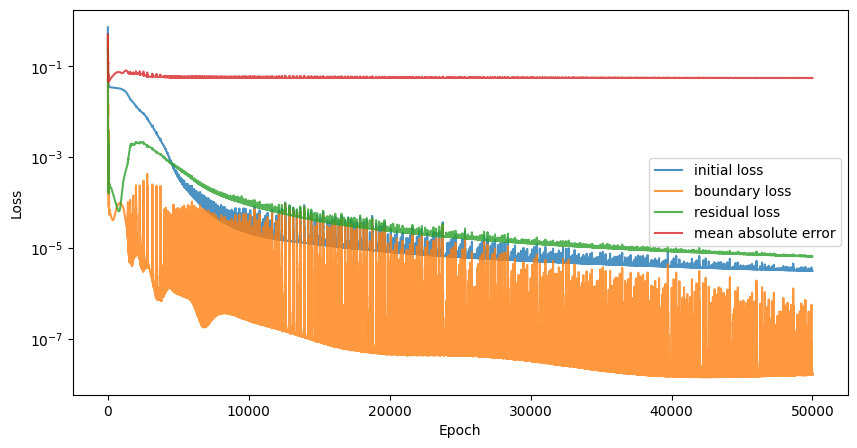

In [58]:
plot_training_loss(history, y_scale='log')



In [ ]:
current_weights = pinn.backbone.get_weights()
with open('KdVSingleSolitonTime10-100.pickle', 'wb') as f:
    pickle.dump(current_weights, f)

1/1 [==============================] - 0s 15ms/step


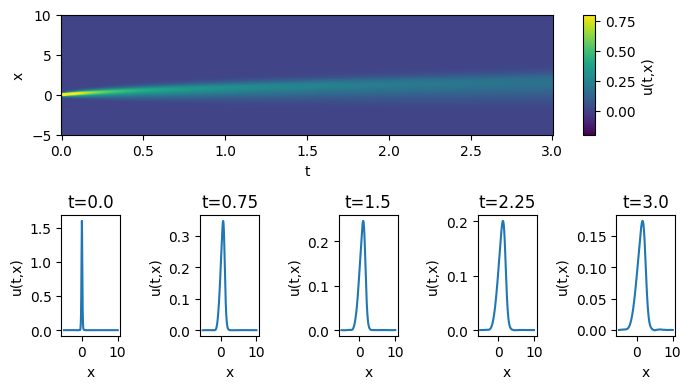

In [59]:
plot_KdV_model(pinn.backbone, x_start,length, time, -0.2, 0.8, t0 = t0, save_path = None, show=True)

In [42]:
alpha

0.0

In [60]:
def plot_snapshots(timeList,num_test_samples = 1000, phi_function = phi_function, pinn = pinn):
    x_flat = np.linspace(x_start, length, num_test_samples)
    t_flat = np.linspace(0, time, num_test_samples)
    x_flat = tf.convert_to_tensor(x_flat)
    t_flat = tf.convert_to_tensor(t_flat)
    # t_, x_ = tf.meshgrid(t_flat, x_flat)
    # tx = tf.concat((tf.reshape(t_, (-1, 1)), tf.reshape(x_, (-1, 1))), axis=1)
    # solution = phi_function_PBC(tx,num_test_samples ,num_test_samples)
    # solution = tf.reshape(solution, x_.shape)
    dt=time/(num_test_samples-1)
    t_cross_sections = timeList
    for i, t_cs in enumerate(t_cross_sections):
        tx = np.stack([np.full(t_flat.shape, t_cs), x_flat], axis=-1)
        print(tx.shape)
        u = pinn.backbone.predict(tx, batch_size=num_test_samples)
        plt.plot(x_flat, u, label = 'prediction at time {}'.format(t_cs))
        # plt.plot(x_flat, phi_function(tx),label = 'exact at time {}'.format(t_cs))
        # plt.plot(x_flat, phi_function_solitonsAdded(tx),label = 'added at time {}'.format(t_cs))

        # print(int(t_cs/dt+1))
        # plt.plot(x_flat, solution[:,int(t_cs/dt)], label = 'exact')

        plt.legend()
        # plt.title('t={}'.format(np.round(t_cs,2)))
        plt.xlabel('x')
        plt.ylabel('u(t,x)')
        # plt.ylim([-0.5, 2.])
        # plt.xlim([-50,50])
    return

In [ ]:
import pickle
with open('KdVDoubleSolitonAdded64-128-128-128-64.pickle', 'rb') as f:
    my_weights = pickle.load(f)

pinn.backbone.set_weights(my_weights)

In [ ]:
# to set

# with open('PickleFiles/KP/XConfig/HistoryXConfig.pickle', 'rb') as f:
#     Test_hist = pickle.load(f)
# pinn.backbone.set_weights(my_weights)

# to write
with open('PickleFiles/KdV/OneSoliton/HistoryOneSoliton-5neurons.pickle', 'wb') as fp:
    pickle.dump(history, fp)

current_weights = pinn.backbone.get_weights()
with open('PickleFiles/KdV/OneSoliton/KdVOneSolitonTime10-5neurons.pickle', 'wb') as f:
    pickle.dump(current_weights, f)

(1000, 2)
1/1 [==============================] - 0s 16ms/step
(1000, 2)
1/1 [==============================] - 0s 17ms/step
(1000, 2)
1/1 [==============================] - 0s 16ms/step
(1000, 2)
1/1 [==============================] - 0s 16ms/step
(1000, 2)
1/1 [==============================] - 0s 15ms/step
(1000, 2)
1/1 [==============================] - 0s 15ms/step
(1000, 2)
1/1 [==============================] - 0s 17ms/step
(1000, 2)
1/1 [==============================] - 0s 16ms/step


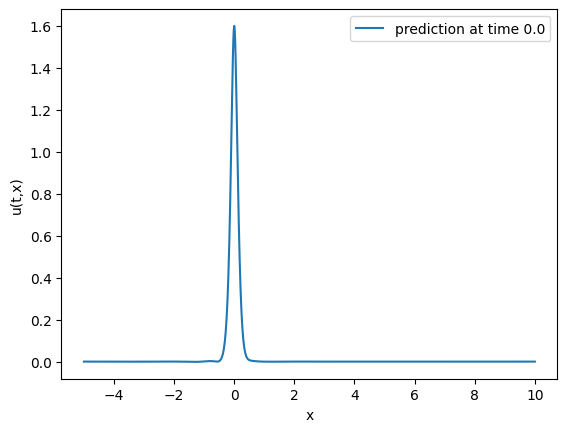

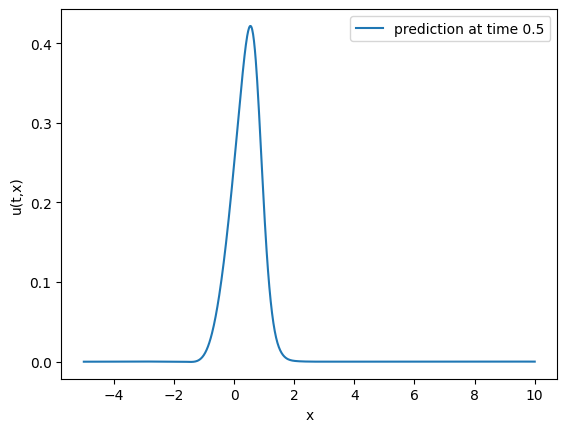

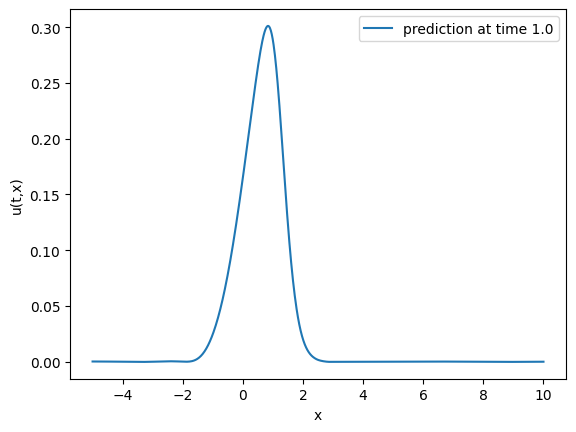

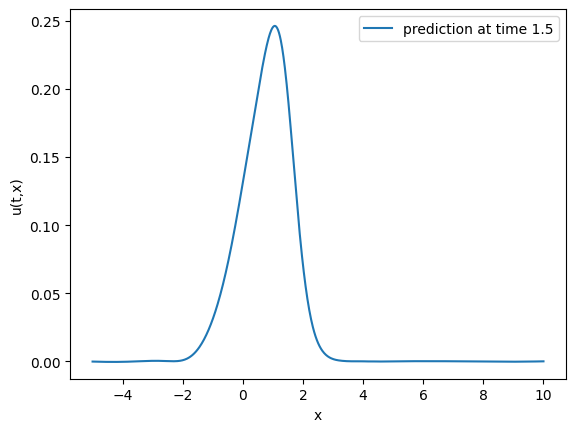

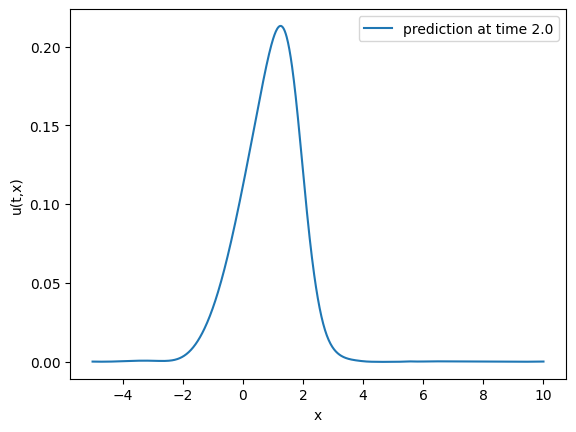

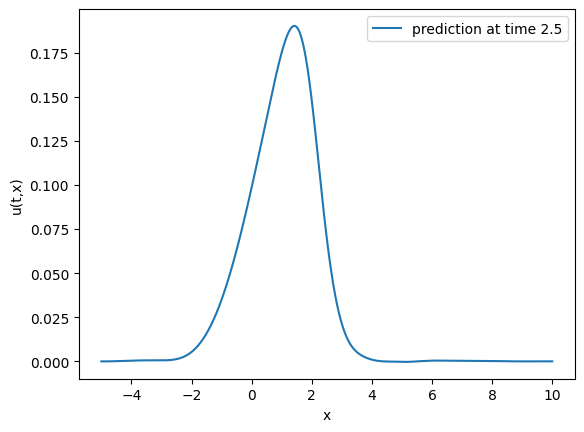

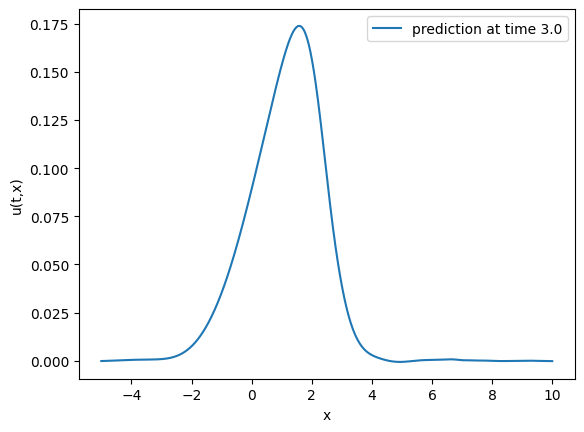

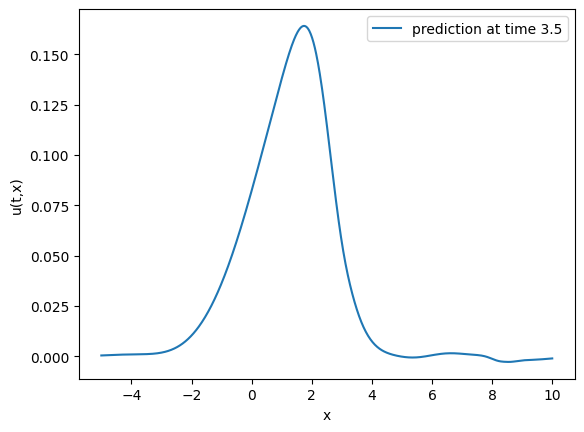

In [61]:
T = np.arange(0.,time+1.,.5)
for inde, Tt in enumerate(T):
  plt.figure()
  plot_snapshots([Tt], phi_function = phi_function, pinn = pinn)
  # plt.savefig(str(os.getcwdb())[2:-1]+"/FinalPictures/1SolitonKdV/KdV1SolitonAddedTime"+str(inde)+".pdf",format ='pdf',bbox_inches="tight")

In [ ]:

# put the images into the frames variable
import imageio
frames = []
timesGIF = np.arange(0,10.5,0.5)
for inde, t in enumerate(T):
    image = imageio.v2.imread(str(os.getcwdb())[2:-1]+"/GIFs/KdVDoubleSolitonAdded/KdV2SolitonTime"+str(inde)+'.png')
    frames.append(image)
    print(t)


0.0
0.5
1.0
1.5
2.0
2.5
3.0
3.5
4.0
4.5
5.0
5.5
6.0
6.5
7.0
7.5
8.0
8.5
9.0
9.5
10.0


In [ ]:
# convert frames to GIF
GIFpath = str(os.getcwdb())[2:-1]+'/GIFs/KdVDoubleSolitonAdded.gif'
imageio.mimsave(GIFpath, # output gif
                frames,          # array of input frames
                fps = 5)         # optional: frames per second

In [ ]:
backbone2 = create_dense_model([32, 32, 32, 32, 32], activation='tanh', initializer='glorot_normal', \
    n_inputs=2, n_outputs=1)
pinn2 = KdVPinn(backbone2, k=6., loss_boundary_weight=1000.)
scheduler = tf.keras.optimizers.schedules.ExponentialDecay(1e-3, decay_steps= 1000, decay_rate=0.97)
optimizer = tf.keras.optimizers.Adam(learning_rate=scheduler, clipnorm=1.)
pinn2.compile(optimizer=optimizer)

In [ ]:
(tx_eqn, y_eqn), (tx_init, y_init), (tx_boundary, y_boundary) = simulate_kdv(50000, phi_function3, boundary_function, x_start, length, t0+1., time+1., n_init = None, n_bnd = None, random_seed = 42, dtype=tf.float32)


In [ ]:
inputs = [tx_eqn, tx_init, tx_boundary, tx_boundary, tx_boundary]
outputs = [phi_function3(tx_eqn), y_eqn, pinn.backbone.predict(tx_init, batch_size=tx_init.shape[0]), y_boundary]

1/1 [==============================] - 0s 66ms/step


In [ ]:
history = pinn2.fit_custom(inputs, outputs, epochs = 20000, print_every = 500)

Epoch 0, Loss Residual: 0.0004, Loss Initial: 0.1730, Loss Boundary: 0.0919, MAE: 0.3185
Epoch 500, Loss Residual: 0.0023, Loss Initial: 0.0460, Loss Boundary: 0.0000, MAE: 0.0861
Epoch 1000, Loss Residual: 0.0016, Loss Initial: 0.0352, Loss Boundary: 0.0001, MAE: 0.0830
Epoch 1500, Loss Residual: 0.0021, Loss Initial: 0.0306, Loss Boundary: 0.0000, MAE: 0.0711
Epoch 2000, Loss Residual: 0.0022, Loss Initial: 0.0291, Loss Boundary: 0.0000, MAE: 0.0685
Epoch 2500, Loss Residual: 0.0021, Loss Initial: 0.0282, Loss Boundary: 0.0000, MAE: 0.0722
Epoch 3000, Loss Residual: 0.0023, Loss Initial: 0.0270, Loss Boundary: 0.0000, MAE: 0.0673
Epoch 3500, Loss Residual: 0.0021, Loss Initial: 0.0262, Loss Boundary: 0.0000, MAE: 0.0653
Epoch 4000, Loss Residual: 0.0021, Loss Initial: 0.0245, Loss Boundary: 0.0000, MAE: 0.0664
Epoch 4500, Loss Residual: 0.0025, Loss Initial: 0.0209, Loss Boundary: 0.0000, MAE: 0.0607
Epoch 5000, Loss Residual: 0.0025, Loss Initial: 0.0160, Loss Boundary: 0.0000, MAE:

In [ ]:
current_weights = pinn2.backbone.get_weights()
with open('KdVTripleSolitonTime1064-128-128-128-64.pickle', 'wb') as f:
    pickle.dump(current_weights, f)